# Model tutorial

In this tutorial we show how to build a simple model with two point sources, how to save it for later use, and re-load it back. We will also plot the spectra of the two point sources, with their components.

See the documents about creating and getting information about functions, point sources and extended sources for details about these operations. Here we only focus on the global model.

In [2]:
from astromodels import *

# We also import astropy units to show the unit-conversion
# feature
import astropy.units as u

## Define sources

Now let's define a point source (see "Creating point sources" for details and alternative way to accomplish this):

In [3]:
# Let's start by defining a simple point source with a power law spectrum

pts1 = PointSource('source_1', ra=125.6, dec=-75.3, 
                   spectral_shape=powerlaw())

# Get some info about what we just created
pts1.display()

* source_1 (point source): 
    * position: 
      * ra: 125.6
      * dec: -75.3
      * equinox: J2000
    * spectrum: 
      * main: 
        * powerlaw: 
          * logK: 0.0
          * piv: 1.0
          * index: -2.0

Now let's define another source, this time at Galactic Coordinates l = 11.25, b = -22.5, and with two spectral components:

In [4]:
# Another point source with two spectral components

spectrum1 = powerlaw(logK=0.2, index=-0.75)
component1 = SpectralComponent('synchrotron',spectrum1)

spectrum2 = powerlaw(logK=-0.8, index=-1.0)
component2 = SpectralComponent('IC',spectrum2)

point_source2 = PointSource('source_2', l=11.25, b=-22.5, components=[component1,component2])

# Have a look at what we just created

point_source2.display()

* source_2 (point source): 
    * position: 
      * l: 11.25
      * b: -22.5
      * equinox: J2000
    * spectrum: 
      * synchrotron: 
        * powerlaw: 
          * logK: 0.2
          * piv: 1.0
          * index: -0.75
      * IC: 
        * powerlaw: 
          * logK: -0.8
          * piv: 1.0
          * index: -1.0

## Create a model

Now let's create our model, which comprises our two sources:

In [5]:
# Build a model with the two point sources

my_model = Model(pts1, point_source2)

Of course you can use as many sources as needed, like my_model = Model(pts1, pts2, pts3...)

## Getting information about a model

Using the .display() method we can see all free parameters currently in the model:

In [6]:
my_model.display()

name,value,min_value,max_value,delta,free
source_1.spectrum.main.powerlaw.logK,0.0,-40,40,0.1,True
source_1.spectrum.main.powerlaw.index,-2.0,-10,10,0.2,True
source_2.spectrum.synchrotron.powerlaw.logK,0.2,-40,40,0.1,True
source_2.spectrum.synchrotron.powerlaw.index,-0.75,-10,10,0.2,True
source_2.spectrum.IC.powerlaw.logK,-0.8,-40,40,0.1,True
source_2.spectrum.IC.powerlaw.index,-1.0,-10,10,0.2,True


A dictionary of free parameters can be obtained like this:

In [7]:
free_parameters = my_model.free_parameters

We can use such dictionary to loop over all free parameters:

In [8]:
for parameter_name, parameter in free_parameters.iteritems():
    
    print("Parameter %s is free" % parameter_name)

Parameter source_1.spectrum.main.powerlaw.logK is free
Parameter source_1.spectrum.main.powerlaw.index is free
Parameter source_2.spectrum.synchrotron.powerlaw.logK is free
Parameter source_2.spectrum.synchrotron.powerlaw.index is free
Parameter source_2.spectrum.IC.powerlaw.logK is free
Parameter source_2.spectrum.IC.powerlaw.index is free


More information on a particular source can be obtained like:

In [9]:
my_model.source_1.display()

* source_1 (point source): 
    * position: 
      * ra: 125.6
      * dec: -75.3
      * equinox: J2000
    * spectrum: 
      * main: 
        * powerlaw: 
          * logK: 0.0
          * piv: 1.0
          * index: -2.0

More information about a particular instance of a function can be obtained like:

In [10]:
my_model.source_1.spectrum.main.powerlaw.display()

* description: A simple power-law with normalization expressed as a logarithm
  * formula: $ \frac{dN}{dx} = 10^{logK}~\frac{x}{piv}^{index} $
  * parameters: 
    * logK: 
      * value: 0.0
      * min_value: -40
      * max_value: 40
      * unit: dex(1 / (cm2 keV s))
      * delta: 0.1
      * free: True
    * piv: 
      * value: 1.0
      * min_value: None
      * max_value: None
      * unit: keV
      * delta: 0.1
      * free: False
    * index: 
      * value: -2.0
      * min_value: -10
      * max_value: 10
      * unit: 
      * delta: 0.2
      * free: True

## Accessing and modifying sources and parameters from the model instance

### Fully-qualified paths

Each source and each parameter has a precise path within the model. These paths are displayed by the .display() method of the model instance (see above), and can be used like my_model.[path]. For example:

In [11]:
my_model.display()

name,value,min_value,max_value,delta,free
source_1.spectrum.main.powerlaw.logK,0.0,-40,40,0.1,True
source_1.spectrum.main.powerlaw.index,-2.0,-10,10,0.2,True
source_2.spectrum.synchrotron.powerlaw.logK,0.2,-40,40,0.1,True
source_2.spectrum.synchrotron.powerlaw.index,-0.75,-10,10,0.2,True
source_2.spectrum.IC.powerlaw.logK,-0.8,-40,40,0.1,True
source_2.spectrum.IC.powerlaw.index,-1.0,-10,10,0.2,True


In [12]:
# Access the logK parameters of the powerlaw spectrum of the main component for source 1:

my_model.source_1.spectrum.main.powerlaw.logK = -0.5

# Access the logK parameters of the spectrum of the IC component of source 2:

my_model.source_2.spectrum.IC.powerlaw.logK = -0.32

The structure of these paths is easy to understand. The model is a tree-like structure. The root of the tree is always the model instance itself. The second level is constituted by the various sources. The structure within a source can be understood by calling the .display method:

In [13]:
my_model.source_1.display()

* source_1 (point source): 
    * position: 
      * ra: 125.6
      * dec: -75.3
      * equinox: J2000
    * spectrum: 
      * main: 
        * powerlaw: 
          * logK: -0.5
          * piv: 1.0
          * index: -2.0

Each indentation represents one level, so to access the "ra" element we can follow the levels shown by the .display() method:

In [14]:
ra_parameter = my_model.source_1.position.ra

ra_parameter.display()

# NOTE: this is a Parameter instance. To get the position of the source as a
# floating point number, use:
# my_model.source_1.position.get_ra()
# which will work for any source

Parameter ra = 125.6
(min_value = 0.0, max_value = 360.0, delta = 12.56, free = False)

while to access the index parameter of the power law function we can do:

In [15]:
logK_parameter = my_model.source_1.spectrum.main.powerlaw.logK

logK_parameter.display()

Parameter logK = -0.5
(min_value = -40, max_value = 40, delta = 0.1, free = True)

Finally, there is an alternative way of using paths, which might be more adapt for scripts:

In [16]:
my_model['source_1.spectrum.main.powerlaw.logK'].display()

Parameter logK = -0.5
(min_value = -40, max_value = 40, delta = 0.1, free = True)

You can find much more information in the document "Additional features for scripts and applications".

These fully-qualified paths are unique to each element, are very descriptive and easy to understand. They can always be used and are encouraged in general, but especially in scripts, when the effort spent writing them is paid off in terms of clarity. However, there is an alternative way which might be more convenient in certain situation, especially when models are simple and the chances of getting confused are low. This alternative method is described below.

### Using shortcuts

Exploiting the feature of the python language, we can create names ("shortcuts") for objects:

In [17]:
# Create a "shortcut" for the spectrum of a source

powerlaw_1 = my_model.source_1.spectrum.main.powerlaw

# Now we can change the values of that power law as:
powerlaw_1.logK = -1.2

# GOTCHA: while it is possible to create shortcuts for parameters, it is not encouraged
# Indeed, this will not work:
# logK_1 = my_model.source_1.spectrum.main.powerlaw.logK
# logK_1 = -1.2 # WILL NOT WORK
# In order to use a shortcut for a parameter to change its value, you have to explicitly
# set its property 'value':
# logK_1.value = -1.2 # This will work

Shortcut can point at any point of the tree:

In [18]:
# Create a shortcut of a source
source_1 = my_model.source_1

# Now we can do:
source_1.spectrum.main.powerlaw.index = -2.3

# Create a shortcut for a component

main_component = my_model.source_1.spectrum.main

# Now we can do:
main_component.powerlaw.index = -1.3

If you are ever in doubt of what a particular shortcut stands for, you can always retrieve the full path of the element the shortcut is pointing to like this:

In [19]:
print(main_component.path)

source_1.spectrum.main


## Saving a model to file

An existing model can be saved to a file with:

In [20]:
# Save the model to a file, overwriting it if already existing

my_model.save('my_model.yml', overwrite=True)

The content of the file is YAML code, which is human-readable and very easy to understand. Let's have a look:

In [21]:
with open('my_model.yml') as yaml_file:
    
    print("".join(yaml_file.readlines()))

source_1 (point source):

  position:

    ra: {value: 125.6, min_value: 0.0, max_value: 360.0, unit: '', delta: 12.56, free: false}

    dec: {value: -75.3, min_value: -90.0, max_value: 90.0, unit: '', delta: 7.53,

      free: false}

    equinox: J2000

  spectrum:

    main:

      powerlaw:

        logK: {value: -1.2, min_value: -40, max_value: 40, unit: dex(1 / (cm2 keV

            s)), delta: 0.1, free: true}

        piv: {value: 1.0, min_value: null, max_value: null, unit: keV, delta: 0.1,

          free: false}

        index: {value: -1.3, min_value: -10, max_value: 10, unit: '', delta: 0.2,

          free: true}

      polarization: {}

source_2 (point source):

  position:

    l: {value: 11.25, min_value: 0.0, max_value: 360.0, unit: '', delta: 1.125, free: false}

    b: {value: -22.5, min_value: -90.0, max_value: 90.0, unit: '', delta: 2.25, free: false}

    equinox: J2000

  spectrum:

    synchrotron:

      powerlaw:

        logK: {value: 0.2, min_value: -40, m

## Load a model from a file

Now suppose that you want to load back a file you created in a previous session. You can do it with:

In [22]:
my_model = load_model('my_model.yml')

# Explore the model we just loaded back

my_model.display()

name,value,min_value,max_value,delta,free
source_1.spectrum.main.powerlaw.logK,-1.2,-40,40,0.1,True
source_1.spectrum.main.powerlaw.index,-1.3,-10,10,0.2,True
source_2.spectrum.synchrotron.powerlaw.logK,0.2,-40,40,0.1,True
source_2.spectrum.synchrotron.powerlaw.index,-0.75,-10,10,0.2,True
source_2.spectrum.IC.powerlaw.logK,-0.32,-40,40,0.1,True
source_2.spectrum.IC.powerlaw.index,-1.0,-10,10,0.2,True


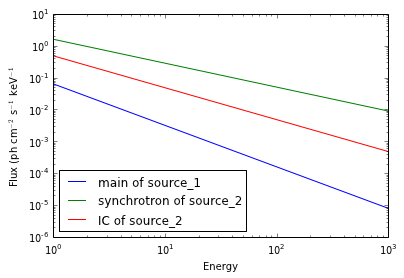

In [23]:
# Now evaluate and plot our models. You need matplotlib for this

import matplotlib.pyplot as plt

%matplotlib inline

# Energies where we want to evaluate the model

e = np.logspace(0,3,100)

# Loop over the sources

for src_name, src in my_model.point_sources.iteritems():
    
    # Loop over the components of each source
    
    for comp_name, component in src.components.iteritems():
        
        # Get the differential flux (in ph/cm2/s)
        
        flux = component.shape(e)
        
        # this can also be accomplished with:
        # flux = component.powerlaw(e)
        # but this requires to know the name of the
        # spectral shape which was used
        
        # Plot this component for this source
        
        plt.plot(e, flux,label="%s of %s" % (component.name, src.name))

plt.legend(loc=0)
plt.loglog()
plt.xlabel("Energy")
plt.ylabel(r"Flux (ph cm$^{-2}$ s$^{-1}$ keV$^{-1}$")

## Linking parameters

Sometimes you want to link two parameters of a model so that they have the same value. This can be easily accomplished in astromodels:

In [24]:
# Link the photon index of the first source with the
# photon index of the IC component of the second source

my_model.link(my_model.source_2.spectrum.IC.powerlaw.index,
              my_model.source_1.spectrum.main.powerlaw.index)

my_model.display()

Point sources: source_1,source_2

Extended sources: (none)

Free parameters:
                    name                     value min_value ... delta free
-------------------------------------------- ----- --------- ... ----- ----
        source_1.spectrum.main.powerlaw.logK  -1.2       -40 ...   0.1 True
       source_1.spectrum.main.powerlaw.index  -1.3       -10 ...   0.2 True
 source_2.spectrum.synchrotron.powerlaw.logK   0.2       -40 ...   0.1 True
source_2.spectrum.synchrotron.powerlaw.index -0.75       -10 ...   0.2 True
          source_2.spectrum.IC.powerlaw.logK -0.32       -40 ...   0.1 True


Linked parameters:
                name                ... current value
----------------------------------- ... -------------
source_2.spectrum.IC.powerlaw.index ...          -1.3

### Advanced use of linking: arbitrary functions

Astromodels takes this a step further. Parameters can be linked to each other through any function. The parameters of the linking function become parameters of the model like any other, and can be left free to vary or fixed. For example, let's consider the case where we want the photon index of the IC component of the second source (p2) to be equal to the photon index of the first source (p1) plus a constant. We can link the two parameters with the 'bias' function f(x) = x + k, so that p2(p1) = p1 + k:

In [25]:
# Link the photon indexes through the 'bias' function, i.e.,
# the photon index of the IC component of the second source is fixed to be the
# photon index of the first source plus a constant k

link_function = bias()

my_model.link(my_model.source_2.spectrum.IC.powerlaw.index,
              my_model.source_1.spectrum.main.powerlaw.index,
              link_function)

# The parameters of the linking function become parameters
# of the model, and are put in the model tree under the parameter they are
# linking.
# In this case the only parameter of the 'bias' function ('k') becomes then
# my_model.source_2.spectrum.IC.powerlaw.logK.bias.k

my_model.display()

Point sources: source_1,source_2

Extended sources: (none)

Free parameters:
                    name                     value min_value ... delta free
-------------------------------------------- ----- --------- ... ----- ----
        source_1.spectrum.main.powerlaw.logK  -1.2       -40 ...   0.1 True
       source_1.spectrum.main.powerlaw.index  -1.3       -10 ...   0.2 True
 source_2.spectrum.synchrotron.powerlaw.logK   0.2       -40 ...   0.1 True
source_2.spectrum.synchrotron.powerlaw.index -0.75       -10 ...   0.2 True
          source_2.spectrum.IC.powerlaw.logK -0.32       -40 ...   0.1 True
  source_2.spectrum.IC.powerlaw.index.bias.k   0.0      None ...   0.1 True


Linked parameters:
                name                ... current value
----------------------------------- ... -------------
source_2.spectrum.IC.powerlaw.index ...          -1.3

If we want to fix say p2 = p1 - 1.2, we can fix k to that:

In [26]:
my_model.source_2.spectrum.IC.powerlaw.index.bias.k = -1.2
my_model.source_2.spectrum.IC.powerlaw.index.bias.k.fix = True

my_model.display()

Point sources: source_1,source_2

Extended sources: (none)

Free parameters:
                    name                     value min_value ... delta free
-------------------------------------------- ----- --------- ... ----- ----
        source_1.spectrum.main.powerlaw.logK  -1.2       -40 ...   0.1 True
       source_1.spectrum.main.powerlaw.index  -1.3       -10 ...   0.2 True
 source_2.spectrum.synchrotron.powerlaw.logK   0.2       -40 ...   0.1 True
source_2.spectrum.synchrotron.powerlaw.index -0.75       -10 ...   0.2 True
          source_2.spectrum.IC.powerlaw.logK -0.32       -40 ...   0.1 True


Linked parameters:
                name                ... current value
----------------------------------- ... -------------
source_2.spectrum.IC.powerlaw.index ...          -2.5

As another example, we might link the two parameters using a power law function:

In [27]:
my_model.link(my_model.source_2.spectrum.IC.powerlaw.index,
              my_model.source_1.spectrum.main.powerlaw.index,
              powerlaw())

my_model.display()

Point sources: source_1,source_2

Extended sources: (none)

Free parameters:
                       name                        value ... delta free
-------------------------------------------------- ----- ... ----- ----
              source_1.spectrum.main.powerlaw.logK  -1.2 ...   0.1 True
             source_1.spectrum.main.powerlaw.index  -1.3 ...   0.2 True
       source_2.spectrum.synchrotron.powerlaw.logK   0.2 ...   0.1 True
      source_2.spectrum.synchrotron.powerlaw.index -0.75 ...   0.2 True
                source_2.spectrum.IC.powerlaw.logK -0.32 ...   0.1 True
 source_2.spectrum.IC.powerlaw.index.powerlaw.logK   0.0 ...   0.1 True
source_2.spectrum.IC.powerlaw.index.powerlaw.index  -2.0 ...   0.2 True


Linked parameters:
                name                ... current value 
----------------------------------- ... --------------
source_2.spectrum.IC.powerlaw.index ... 0.591715976331

We can use arbitrarily complex functions as link function, if needed (see "Creating and modifying functions" for more info on how to create composite functions):

In [28]:
# A random composite function (see "Creating and modifying functions" for more info)
crazy_link = powerlaw() + gaussian()

my_model.link(my_model.source_2.spectrum.IC.powerlaw.index,
              my_model.source_1.spectrum.main.powerlaw.index,
              crazy_link)

my_model.display()

name,value,min_value,max_value,delta,free
source_1.spectrum.main.powerlaw.logK,-1.2,-40,40,0.1,True
source_1.spectrum.main.powerlaw.index,-1.3,-10,10,0.2,True
source_2.spectrum.synchrotron.powerlaw.logK,0.2,-40,40,0.1,True
source_2.spectrum.synchrotron.powerlaw.index,-0.75,-10,10,0.2,True
source_2.spectrum.IC.powerlaw.logK,-0.32,-40,40,0.1,True
source_2.spectrum.IC.powerlaw.index.powerlaw.logK,0.0,-40,40,0.1,True
source_2.spectrum.IC.powerlaw.index.powerlaw.index,-2.0,-10,10,0.2,True
source_2.spectrum.IC.powerlaw.index.composite.logK,0.0,-40,40,0.1,True
source_2.spectrum.IC.powerlaw.index.composite.index,-2.0,-10,10,0.2,True
source_2.spectrum.IC.powerlaw.index.composite.mu,0.0,None,None,0.1,True


## Time-varying models and other independent variables

In astromodels parameters can become functions of independent variables such as time. This is accomplished in a way which is similar to the procedure to link parameters described above. First, let's create an independent variable. An IndependentVariable instance is created and added to the model like this:

In [29]:
# Add the time as an independent variable of the model

time = IndependentVariable("time",0.0, unit='s')

my_model.add_independent_variable(time)

The IndependentVariable instance is inserted at the root of the model tree. In this case, can be accessed as:

In [30]:
my_model.time.display()

IndependentVariable time = 0.0
(min_value = None, max_value = None)

We can now link any parameter to be a function of time, like this:

In [31]:
# First define the function. In this case, a linear function ax+b
law = line(a=-0.02,b=-2.0)

# Now link the index of the sync. component of source_2 to be law(t)
# i.e., index = law(t) = a*t + b

my_model.link(my_model.source_2.spectrum.synchrotron.powerlaw.index,
             time,
             law)

In [32]:
my_model.save("time_dependent.yml",overwrite=True)

my_model = load_model("time_dependent.yml")

(0,0,0,)


In [33]:
# This would show the link:
# my_model.display()

# Now changing the value of time will change the value of the parameter
# according to the law. For example, let's loop over 10 s and print
# the value of the parameter

# Reset time
my_model.time = 0.0

for i in range(10):
    
    my_model.time = my_model.time.value + 1.0
    
    print("At time %s s the value of the parameter is %s" % (my_model.time.value, 
                    my_model.source_2.spectrum.synchrotron.powerlaw.index.value))

At time 1.0 s the value of the parameter is -2.02
At time 2.0 s the value of the parameter is -2.04
At time 3.0 s the value of the parameter is -2.06
At time 4.0 s the value of the parameter is -2.08
At time 5.0 s the value of the parameter is -2.1
At time 6.0 s the value of the parameter is -2.12
At time 7.0 s the value of the parameter is -2.14
At time 8.0 s the value of the parameter is -2.16
At time 9.0 s the value of the parameter is -2.18
At time 10.0 s the value of the parameter is -2.2


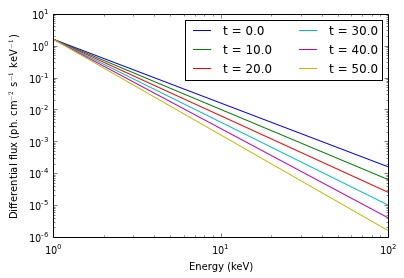

In [34]:
# Now plot the synch. spectrum of the source at different times
# (you will need matplotlib for this)

import matplotlib.pyplot as plt

# This is needed only in the ipython notebook
%matplotlib inline

# Prepare 100 logarithmically distributed energies between 1 and 100 keV
energies = np.logspace(0,2,100)

# Compute and plot the sync. spectrum every 10 s between 0 and 50 seconds

times = np.linspace(0,50,6)

my_model.time = 0.0

for tt in times:
    
    my_model.time = tt
    
    plt.loglog(energies, my_model.source_2.spectrum.synchrotron(energies),label='t = %s' % my_model.time.value)

plt.legend(loc=1,ncol=2)
plt.xlabel("Energy (keV)")
plt.ylabel(r"Differential flux (ph. cm$^{-2}$ s$^{-1}$ keV$^{-1}$)")